<a href="https://colab.research.google.com/github/wlsisl/ESAA_22-2/blob/main/regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## chapter 05 회귀

회귀 분석 : 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법

머신러닝 관점)

피처 : 독립변수

결정 값: 종속변수

* 선형/비선형, 다중/단일 회귀로 나뉨
* 회귀는 분류와 다르게 예측 값이 연속형 숫자값이다. 

[선형 회귀 모델]
* 일반 선형 회귀 : 예측값과 실제 값의 RSS를 최소화 할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델이다.
* 릿지 : 릿지 회귀는 선형 회귀에 L2규제를 추가한 회귀 모델. 
  - L2규제는 상대적으로 큰 회귀 계쑤 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제모델
* 라쏘 : 라쏘 회귀는 선형회귀에 L1규제를 적용한 방식.
  - L2규제가 회귀 계수 값의 크기를 줄이는 데 반해 L1규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것임.
* 엘라스틱넷 : L2,L1규제를 함께 결합한 모델 주로 피처가 많은 데이터 세트에 적용.
* 로지스틱 회귀 : 분류에 사용되는 선형모델.

### 단순 선형 회귀를 통한 회귀 이해

단순 선형 회귀는 독립변수와 종속변수가 각각 하나인 선형 회귀이다. 

머신러닝에서 오류 합 제곱을 최소로 하는 회귀계수를 학습을 통해서 찾는 것이 핵심사항이다.

### 비용 최소화 하기 - 경사 하강법 소개

비용함수가 최소가 되는 W파라미터 구하는 방법 : 경사 하강법

점진적으로 반복적인 계산을 통해 w파라미터 값을 업데이트하면서 오류 값이 최소가 되는 w파라미터를 구하는 방식

더이상 오류 값이 작아지지 않는다면 그 오류 값을 최소 비용으로 판단하고 그때 w값을 최적 파라미터로 반환.

R(w0,w1) = 비용함수 

편미분을 해야함. 

<경사 하강법의 일반적인 프로세스>

* step 1: w1, w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
* step 2: w1을 w1+(보정계수)2/N시그마xi * (실제값 - 예측값)
w0 = wo _ (보정계수)2/N시그마xi * (실제값 - 예측값)로 업데이트 후 다시 비용 함수의 값 계산
* step3: 비용 함수의 값이 감소했으면 다시 step2반복

:

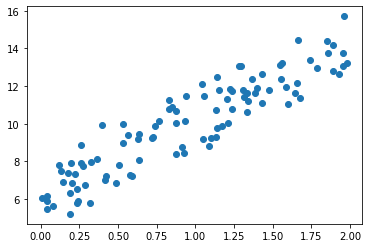

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y = 4X +6을 근사 (w1=4, w0=6).임의의 값은 노이즈를 위해 만듦
X=2*np.random.rand(100,1)
y= 6+4 * X +np.random.randn(100,1)

#X,y데이터 세트 산점도로 시각화
plt.scatter(X,y)



-> 데이터 무작위로 퍼져있다.

#### 비용함수 정의

get_cost()는 실제 y값과 예측된 y값을 인자로 받는다.

In [3]:
def get_cost(y,y_pred):
  N=len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

#### 경사 하강법 구현
* gradient_descent()함수 생성해 구현
 - w1,w0을 0으로 초기화 한 후 iters개수 만큼 반복하면서 w1,w0을 업데이트한다.
* get_weight_update() 함수생성

In [11]:
#w1과 w0를 업데이트 할 w1_update, w0_update
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N = len(y)
  #먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  #예측 배열 계싼하고 예측과 실제 갑스이 차이 계산
  y_pred =np.dot(X, w1.T) + w0
  diff = y-y_pred

  #w0_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  #w1과 w0을 업데이트 할 w1_update와 w0_update계싼
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update



* gradient_descent_steps()함수: 위 함수를 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트하는 함수

In [12]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함.
def gradient_descent_steps(X,y, iters=10000):
  #w0와 w1을 모두 0으로 초기화
  w0= np.zeros((1,1))
  w1= np.zeros((1,1))

  #인자로 주어진 iters만큼 반복적으로 get_weight_update 호출해 w1,w0업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1,w0

* get_cost() 함수 : 예측값과 실제값의 RSS차이를 계산하는 함수

In [13]:
def get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1,w0 = gradient_descent_steps(X,y,iters=10000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]* X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1:3.968 w0:6.222
Gradient Descent Total Cost : 0.9924


y_pred에 기반해 회귀선을 그려보자.

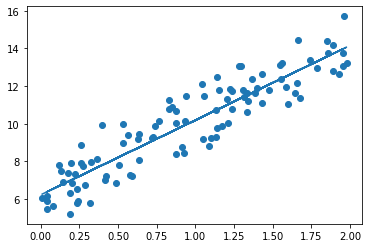

In [14]:
plt.scatter(X,y)
plt.plot(X,y_pred)

확률적 경사 하강법 : 전체 입력 데이터로 w가 업데이트 되는 값을 계싼하는 것이 아니라 일부 데이터만 이용해 w가 업데이터되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장함. 

* 미니 배치 확률적 경사 하강법 : stochastic_gradient_descent_steps()

In [15]:
def stochastic_gradient_descent_steps(X,y,batch_size = 10 , iters=1000):
  w0= np.zeros((1,1))
  w1= np.zeros((1,1))
  prev_cost = 100000
  iter_index= 0

  for ind in range(iters):
    np.random.seed(ind)
    #전체 X,y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  return w1, w0




In [16]:
w1,w0 =  stochastic_gradient_descent_steps(X,y, iters=1000)
print("w1:",round(w1[0,0],3), "w0:",round(w0[0,0],3))
y_pred = w1[0,0] + X + w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost : 5.2576


-> **큰 데이터를 처리할 경우**에는 경사 하강법은 매우 오랜시간이 걸리므로 **확률적 경사 하강법**을 이용한다.



---

### 다중 선형 회귀인 경우
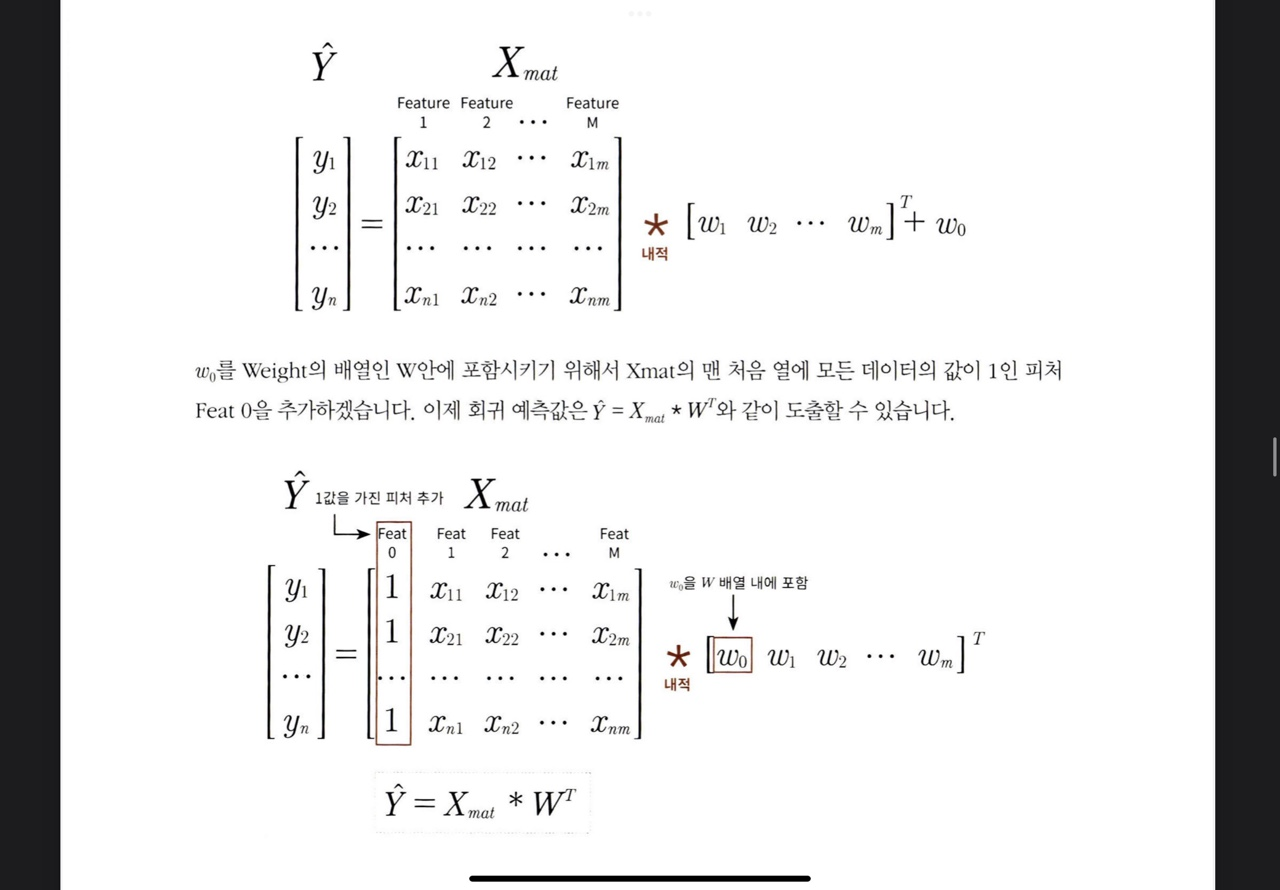

### 다항 회귀와 과적합 / 과소적합 이해

1. 다항 회귀 이해

모든 관계를 직선으로만 표현할 수 없고 독립변수의 단항식이 아니라 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 말함.

* 다항 회귀는 선형 회귀이다. 회귀에서 선형을 따지는 것은 회귀 계수가 선형/비선형인지 따른 것이기 때문이다. 

In [17]:
#polynomialFeatures를 이용해 단항값[x1,x2]를 2차 다항갑승로 [1,x1,x2,x1^2,x1x2,x2^2]로 변환하느 ㄴ예제
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2행렬 생성
X= np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처 : \n',X)

#degree= 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 반환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처 : \n", poly_ftr)

일차 단항식 계수 피처 : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


이제 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LineaerRegression클래스를 이용해 유도해보자.



In [21]:
#3차 다항 계수 피처 값이 입력되면 결정 값을 반환하는 함수

def polynomial_func(X):
  y= 1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y=polynomial_func(X)
print("삼차 다항식 결정값 : \n",y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


-> 이제 일차 단항식 계쑤를 삼차 다항식 계수로 변환하고 이를 선형 회귀에 적용하면 다항 회귀로 구현된다. 

In [24]:
#3차 다항식 변환
poly_tfr = PolynomialFeatures(degree=3).fit_transform(X)
print("삼차 다항식 계수 feature:\n",poly_ftr)

from sklearn.linear_model import LinearRegression
#Lineaer Regression 에 차 다항식 계쑤 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수 \n',np.round(model.coef_, 2))
print('Polynomial 회귀 shape :',model.coef_.shape)

삼차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]
Polynomial 회귀 계수 
 [0.   1.94 1.94 3.87 5.81 7.74]
Polynomial 회귀 shape : (6,)


-> 일차 단항식 계수 피처는 2개였지만 3차 다항식 polynomial변환 이후에는 다항시 ㄱ꼐수 피처가 10개로 늘어남.

* 다항 회귀 구현 : 피처 데이터 세트에 LinearRegression을 통해 3차 다항 회귀 형태의 다항 회귀를 적용하면 회귀 계쑤가 늘어남.

In [27]:
# 사이킷런의 Pipeline객체를 이용해 한 번에 다항 회귀를 구현해봄
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
   y=1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
   return y

#Pipeline객체로 Streamline하게 polynomial featre변환과 Linear Regression을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear', LinearRegression())])

X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model= model.fit(X,y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수있다.
다항식의 차수가 높아질수록 매우 복잡하 ㄴ피처 간의 관계까지 모델링이 가능하다. 

* 차수가 높아질수록 과적합의 문제가 크게 발생한다.
---------------------



In [32]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples =30
X= np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y= true_fun(X) +np.random.randn(n_samples)*0.1

-> 이제 예측 결과를 비교할 다항식 차수를 1,4,15로 변경하면서 예측 결과를 비교하자. 


Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08]입니다.
Degree 15 MSE는 180526263.3177066입니다.


Text(0.5, 1.0, 'Degree 15]nMSE = 1.81e+08(+/-5.42e+08)')

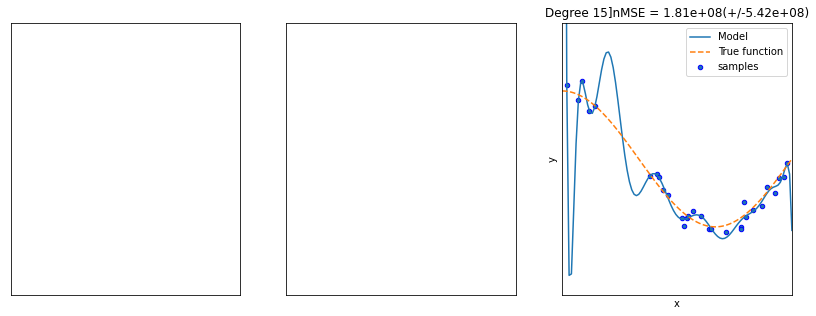

In [44]:
plt.figure(figsize =(14,5))
degrees = [1,4,15]

#다항 회귀의 차수를 1,4,15로 각각ㄱ 변화시키면서 비교한다.
for i in range(len(degrees)):
  ax= plt.subplot(1,len(degrees),i+1)
  plt.setp(ax, xticks=(),yticks=())

#개별 degree별로 polynomial변환해야함
polynomial_features = PolynomialFeatures(degree= degrees[i], include_bias = False)
linear_regression =LinearRegression()
pipeline =Pipeline([("polynomial_features", polynomial_features), ("linear_regression",linear_regression )])
pipeline.fit(X.reshape(-1,1),y)

#교차 검증으로 다항 회귀를 평가한다.
scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring ="neg_mean_squared_error",cv=10)
#Pipeline을 구성하는 세부 객체를 접근하는 named_steps을 이용해 회귀 계수 추출을 하고 있다. 
coefficients = pipeline.named_steps['linear_regression'].coef_
print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients,2)))
print('Degree {0} MSE는 {1}입니다.'.format(degrees[i], -1 * np.mean(scores)))
#0부터 1까지 테스트 데이터를 100개로 나눠 예측 수행
#테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 비교해볼게
X_test = np.linspace(0,1,100)

#예측값 곡선
plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]),label="Model")

#실제 값 곡선
plt.plot(X_test, true_fun(X_test),'--',label="True function")
plt.scatter(X, y , edgecolor='b', s=20, label="samples")

plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc = "best")
plt.title("Degree {}]nMSE = {:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(),scores.std()))

-> 실선 곡선은다항 회귀 예측 곡선이고 점선은 실제 데이터 세트의 코사인 곡선이다 

* 맨 왼쪽의 DEGREE1예측 곡선은 단순한 직선으로서 단순선형회귀오 같다.

* 가운데 DEGRES4예측 곡선은 실제 데이터 세트와 유관한 모습
* 맨 오른쪽 DEGREE15예측 곡선은 mse값이 어처구니 없는 값 발생. 


-> 좋은 모델? 학습 데이터의 ㅐㅍ턴을 하나하나 감안한 지나치게 복잡한 과적합 모델도 아닌 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형잡힌 모델

### 편향 - 분산 프레이드 오프

* 지나치게 한 방향으로 치우친 경향이 있으며 이런 모델을 고분산 성을 가졌다고 표현함.

* 높은 평향/낮은 분산에서 과소적합되기 쉬우며 낮은 평향/높은 분산에서 과적합 되기 쉽다. 

편향과 분산이 서로 프레이드 오프를 이루면서 오류 COST값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적!